# Регрессия в питоне

***
Краткий обзор основных концепций.

* Регрессионные модели
    * Линейная регрессия, логистическая регрессия
* Предсказания с помощью регрессионных моделей
* Методе ресемплирования    
    * TV(H) - деление на тренировочные данные и проверочные
    * CV - перекрестная проверка (кросс-валидация)

Линейная регрессия используется чтобы моделировать и предсказывать непрерывные результаты, логистическая используется для бинарной классификации. Мы рассмотрим некоторые примеры использования этих методов, а также проверки полученных моделей.

Модули использованные на занятии: `statsmodels`, `seaborn`, and `scikit-learn`.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [93]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


***
# Линейная регрессия
### Назначение линейной регрессии
***
<div class="span5 alert alert-info">

<p> Имея датасет $X$ и значения целевого параметра $Y$, линейная регрессия может быть использована для следующих целей: </p>
<ul>
  <li> Построить <b>предиктивную модель</b> для предсказания на будущих значениях $X_i$.  </li>
  <li> Моделировать <b>силу взаимозависимости</b> между каждой переменной $X_i$ и $Y$</li>
    <ul>
      <li> Не всегда и не все $X_i$ связаны с $Y$</li>
      <li> Необходимо понимать какие из $X_i$ вносят наибольшее влияние на значение $Y$ </li>
    </ul>
   <li>В целом линейная регрессия используется в огромном числе других случаев, зачастую являясь первым способом вычисления непрерывной неизвестной. </li>
</ul>
</div>

### Краткий обзор
***

[Линейная регрессия](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F) это метод для моделирования отношений между набором независимых переменных $X$ (факторов, регрессоров, предикторов... *очень* много названий) и зависимой переменной $Y$.  Этот метод предполагает, что переменные $X$ линейно связаны с $Y$.  

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

где $\epsilon$ - неизвестная случайная переменная добавляющая шумы в линейную регрессию. Простой линейной регрессией называется случай, когда переменная Х только одна.

* $\beta_0$ - точка пересечения графика линейной регрессии с осью Y (intercept)

* Множественная линейная регрессия это случай с более чем одной независимой переменной
    * $X_1$, $X_2$, $X_3$, $\ldots$

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 

* В простейшем случае модель линейной регрессии представляет из себя *условное среднее* (conditional mean) значений $Y$ при заданном $X$ проявляющих линейную зависимость.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
[Словарь англоязычных статистических терминов](http://www.learner.org/courses/againstallodds/about/glossary.html)

* Цель - определение коэффициентов (т.е. $\beta_0$ и $\beta_1$). В статистике оценочные значения неизвестных обозначаются "шапочкой" над символом.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Как только мы получим коэффициенты $\hat{\beta}_0$ и $\hat{\beta}_1$, мы сможем использовать их для предсказания новых значений $Y$

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$


* Как мы вычисляем приблизительные значения коэффициентов? 
    * Существует много способов построить (fit) линейную регрессию.
    * **Метод наименьших квадратов** - один из наиболее распространенных.
    * Сегодня мы рассмотрим именно его.
    
### Оценка $\hat\beta$: методом наименьших квадратов
***
[Метод наименьших квадратов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2) is находит приблизительные значения коэффициентов минимизируя следующую разницу: 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

гду $N$ - число наблюдений.  

* Не будем вдаваться в математические детали, но метод наименьших квадратов оценивает $\hat{\beta}_0$ и $\hat{\beta}_1$ минимизируя сумму квадратов остатков (residuals) $r_i = y_i - (\beta_0 + \beta_1 x_i)$ в модели (таким образом делая разницу между реальными $y_i$ и предсказанными моделью $\beta_0 + \beta_1 x_i$ как можно меньше). 

Решение данной проблемы может быть записано в матричном виде.

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

Те кто учил (и помнит) линейную алгебру знают, что для того, чтобы данное уравнение имело решение нужно чтобы матрица $X^T X$ была невырожденной (с определителем отличным от 0). А это предполагает еще несколько допущений, например ранг матрицы $X$ должен соответствовать размеру чтобы $X^T X$ была обратимой, и т. д. **Это очень важно, так как означает что добавление избыточных переменных может привести к ухудшению модели и нестабильным результатам построенной модели.** Мы увидим пример этого ниже.

***
# Данные по недвижимости в Бостоне

[Boston Housing датасет](https://archive.ics.uci.edu/ml/datasets/Housing) содержит информацию о стоимости недвижимости в пригородах Бостона. Этот датасет изначально находился в StatLib библиотеке разработанной и поддерживаемой университетом Карнеги Меллон и сейчас свободно доступен в репозитории UCI Machine Learning. 


## Загрузка датасета средствами `sklearn`
***

Этот датасет включен в состав библиотеки [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) в качестве примера, потому его загрузка не представляет особых проблем. Этим мы и воспользуемся на занятии.

In [168]:
from sklearn.datasets import load_boston
boston = load_boston()

In [170]:
type(boston)

sklearn.datasets.base.Bunch

In [95]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [96]:
boston.data.shape

(506, 13)

In [171]:
# Выведем имена колонок
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [172]:
# В многих датасетах присутствует описание содержащихся данных
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Исследуем данные из датасета. 

In [173]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Как видим в нем нет имен колонок. Давайте исправим это. 

In [174]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Теперь у нас есть pandas DataFrame в переменной `bos` содержащий все данные данные доступные нам для предсказания стоимости жилья в Бостоне.  Давайте создадим переменную `PRICE` которая будет содержать наши цены. Информация по цели регрессии содержится в  `target`. 

In [175]:
print boston.target.shape

(506,)


In [176]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Исследование данных и статистика
***

Давайте посмотрим что у нас содержится в датасете. Сначала используем `describe()` чтобы собрать статистику по каждой колонке. 

In [177]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Диаграммы рассеяния
***

Давайте посмотрим на диаграммы для следующих переменных: 'CRIM', 'RM' and 'PTRATIO'. 

Какие зависимости вы видите? Позитивные или негативные?  Линейные или нет? 

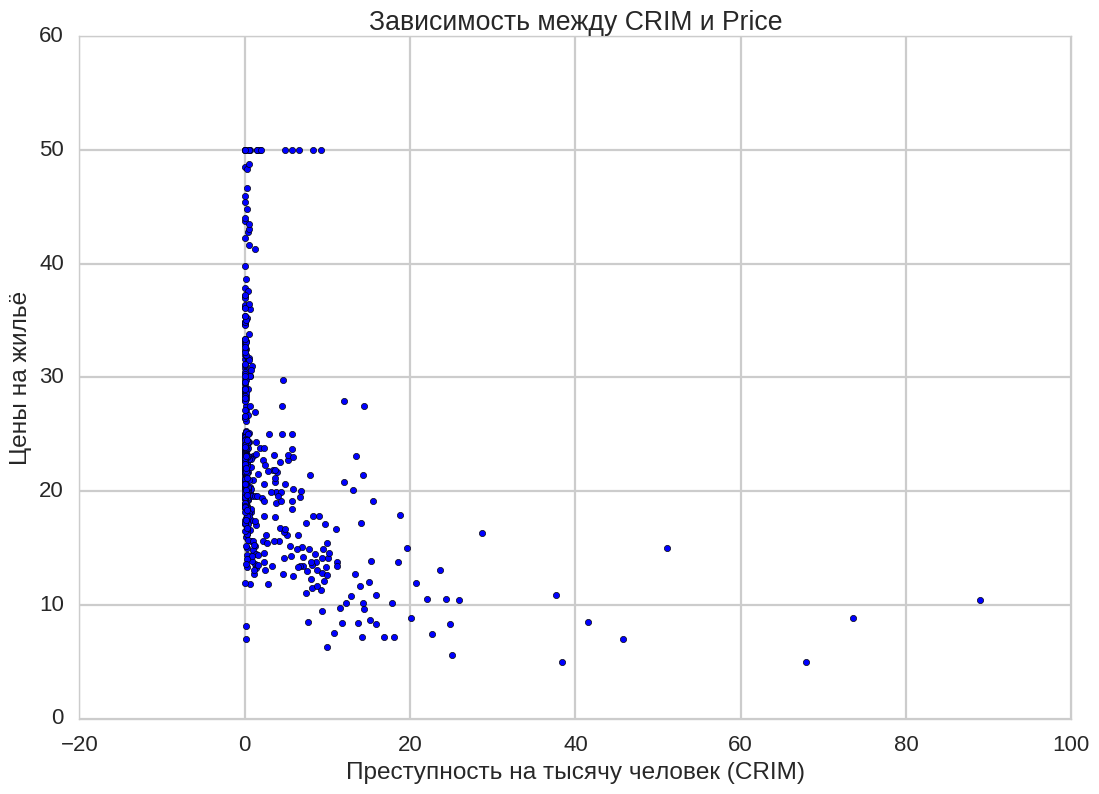

In [179]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel(u"Преступность на тысячу человек (CRIM)")
plt.ylabel(u"Цена")
plt.title(u"Зависимость между CRIM и Price")

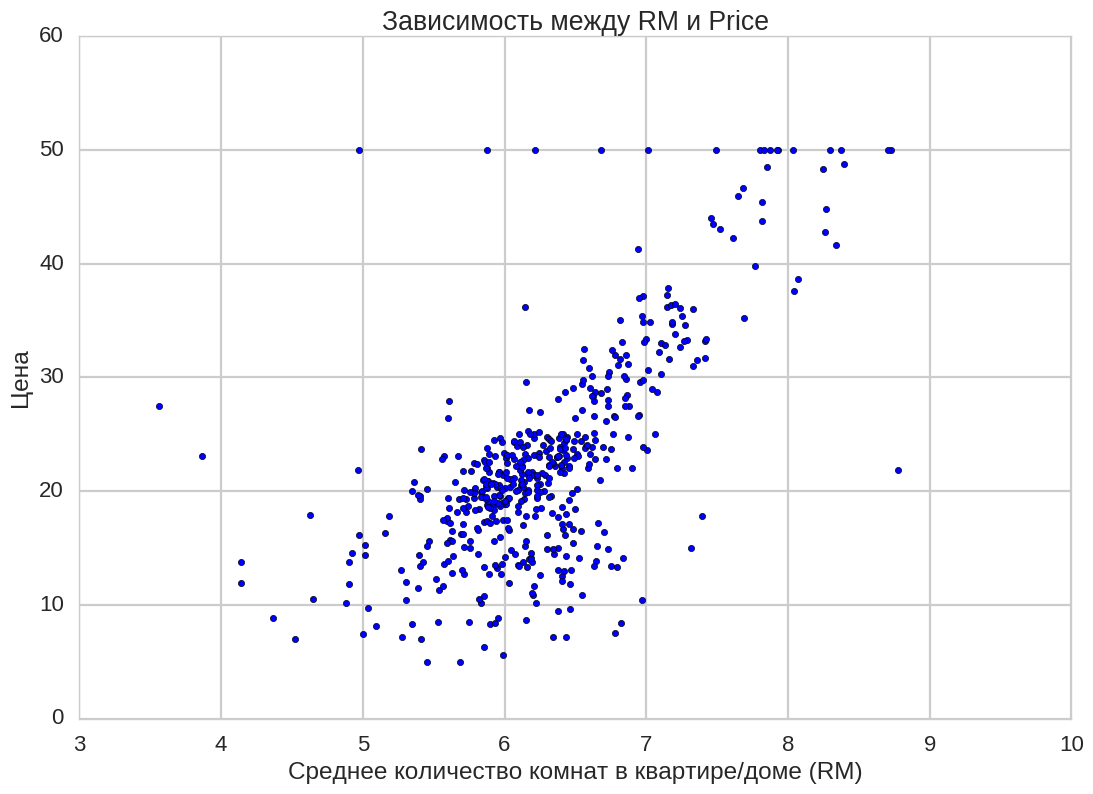

In [180]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel(u"Среднее количество комнат в квартире/доме (RM)")
plt.ylabel(u"Цена")
plt.title(u"Зависимость между RM и Price")

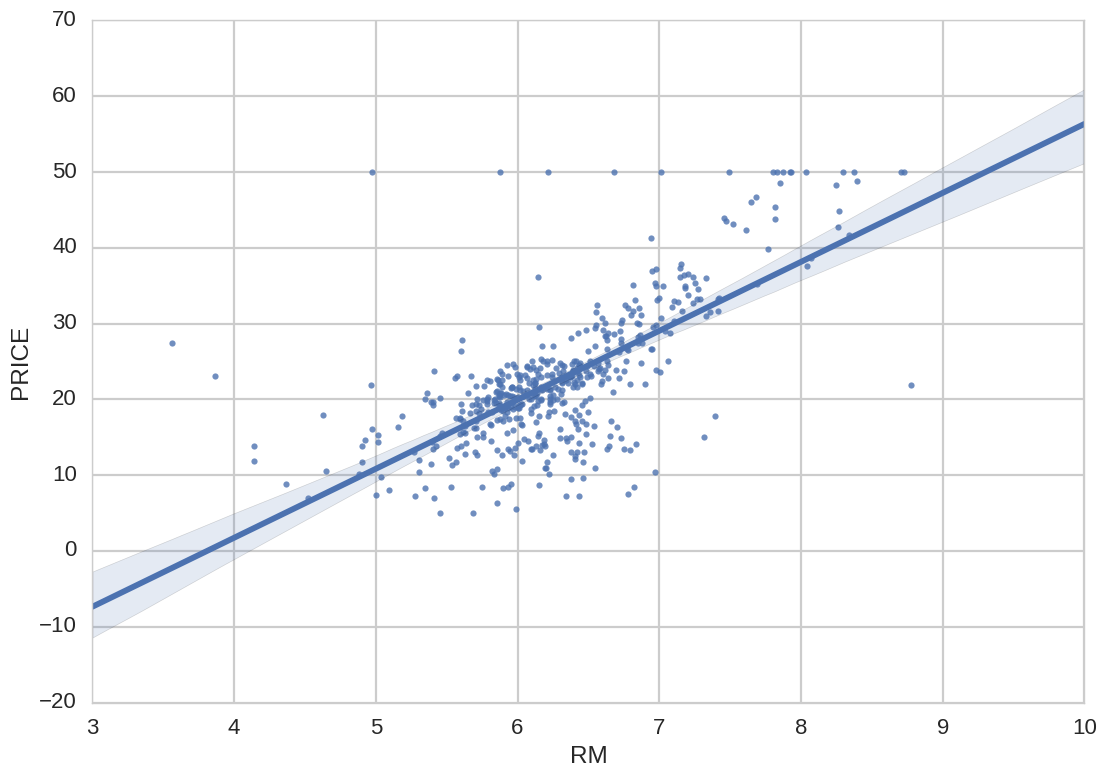

In [181]:
# Используя seaborn regplot мы можем попросить построить регрессию автоматически 

sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

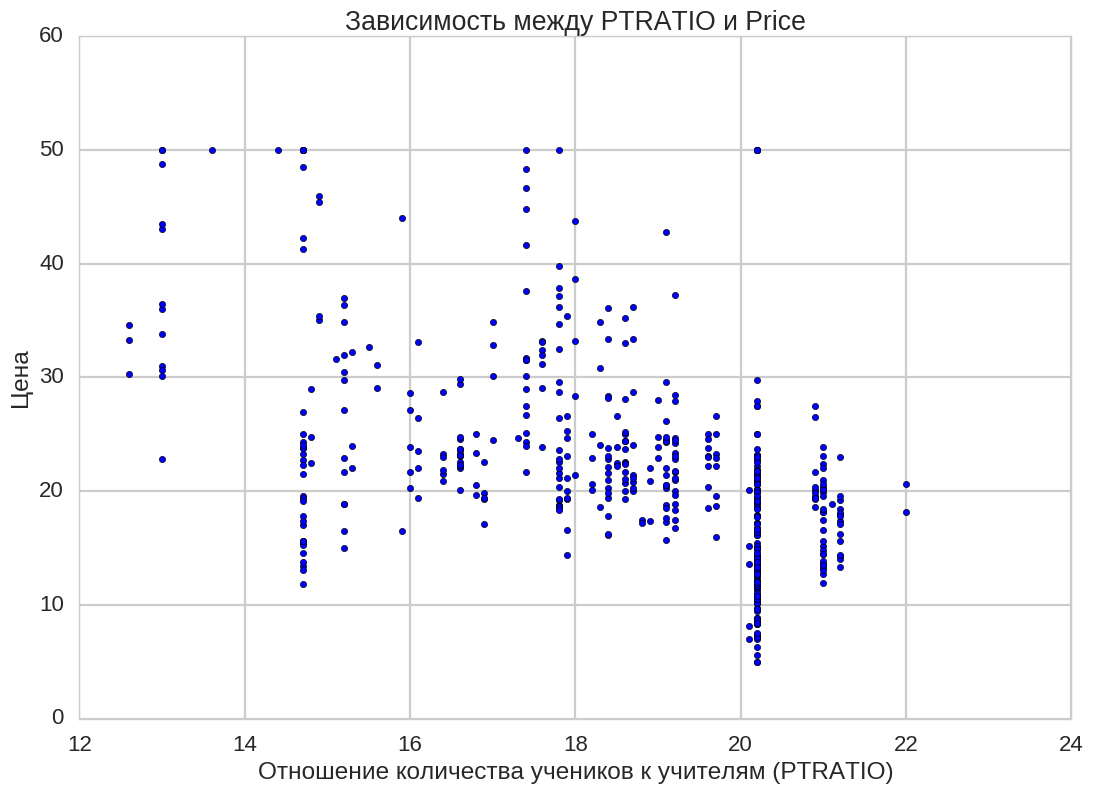

In [183]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel(u"Отношение количества учеников к учителям (PTRATIO)")
plt.ylabel(u"Цена")
plt.title(u"Зависимость между PTRATIO и Price")

### Несколько гистограмм

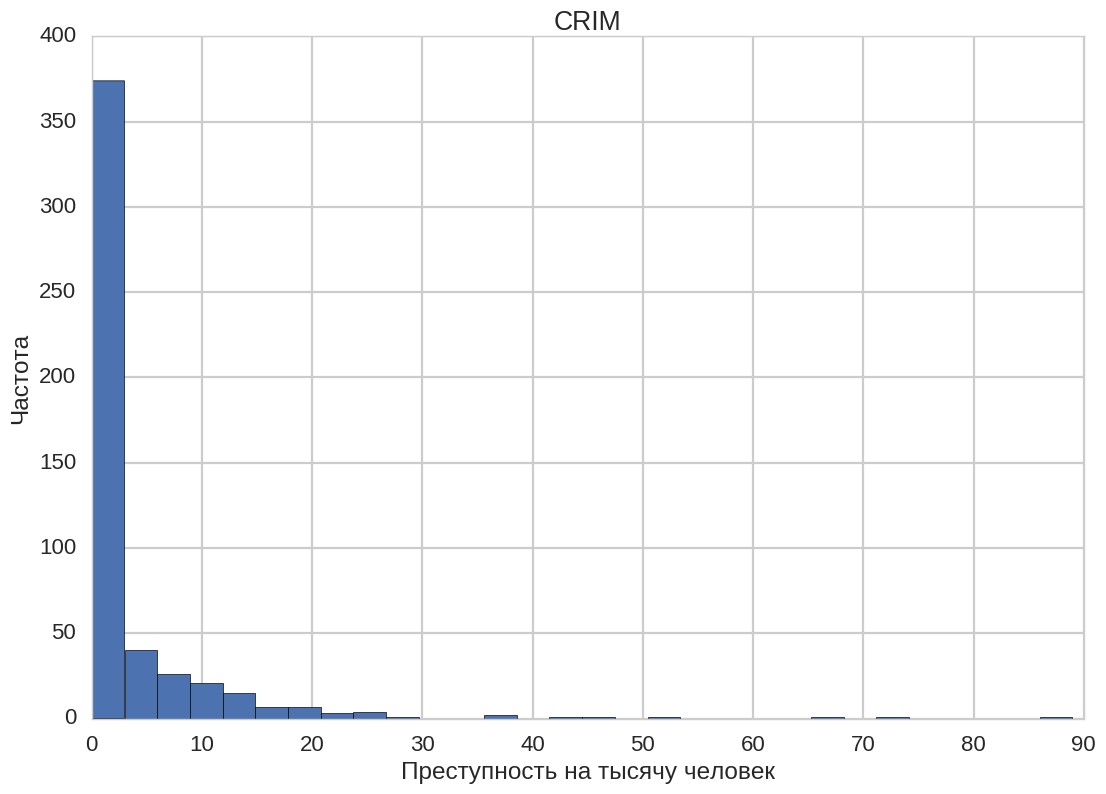

In [185]:
plt.hist(bos.CRIM, bins=30)
plt.title(u"CRIM")
plt.xlabel(u"Преступность на тысячу человек")
plt.ylabel(u"Частота")
plt.show()

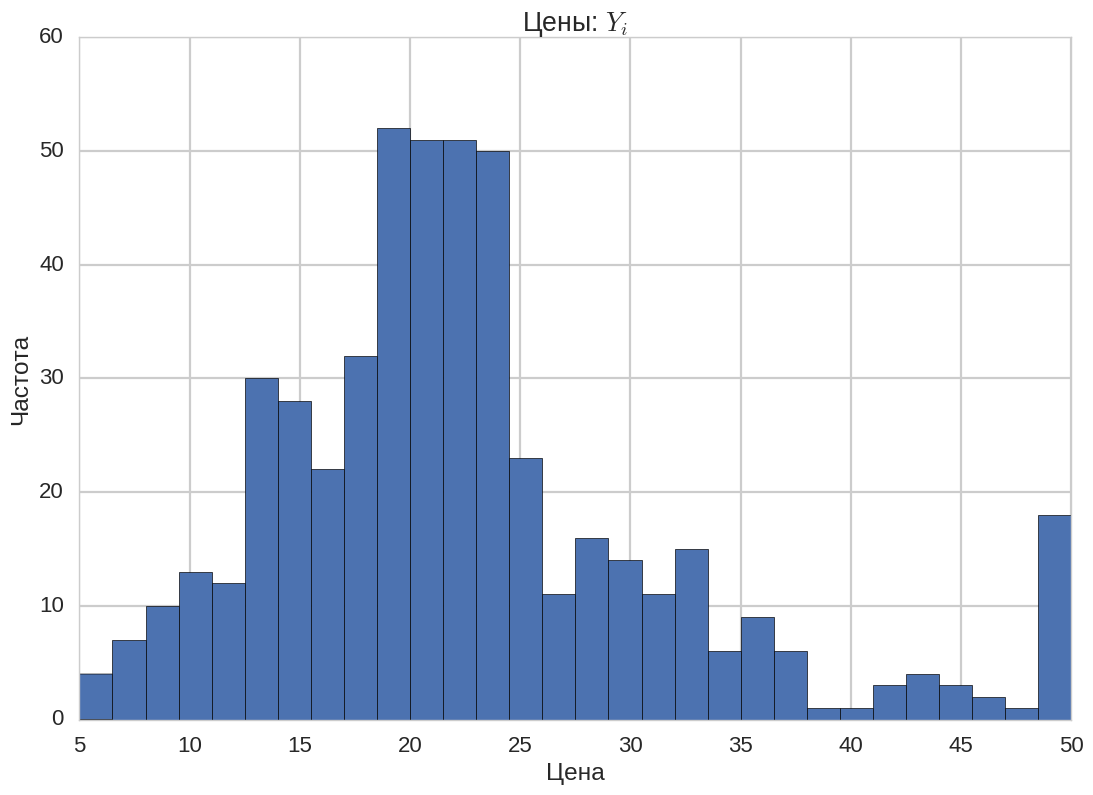

In [188]:
plt.hist(bos.PRICE, bins=30)
plt.title(u'Цены: $Y_i$')
plt.xlabel(u'Цена')
plt.ylabel(u'Частота')
plt.show()

## Линейная регрессия на примере  Boston housing
***

Здесь, 

$Y$ = целевая переменная ("target"), цены в Бостоне

$X$ = все остальные переменные,

которые мы используем для построения линейной регрессии и предсказания цен на жилье в Бостоне. Мы используем метод наименьших квадратов для оптимизации параметров.  

### Построение линейной регрессии с помощью `statsmodels`

In [189]:
# ols - Ordinary least squares, метод, который нам нужен
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [190]:
# statsmodels дружит с pandas
# Строка в двойных кавычках - формула statsmodel, особый формат о котором ниже 
m = ols('PRICE ~ RM',bos).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 09 Feb 2017   Prob (F-statistic):           2.49e-74
Time:                        15:35:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Интерпретация коэффициентов

Вывод модели содержит огромное количество информации. Давайте сконцентрируемся пока на таблице коэффициентов (центральная). Начнем интерпретировать коэффициент `RM` (9.1021) заметив, что значение p-value (`P>|t|`) практически неотличимо от нуля. Само значение мы можем интерпретировать так, что если бы мы сравнивали два пригорода, единственное отличие в которых было бы в среднем количестве комнат в жилье (например $5$ для первого и $6$ для второго) то средняя разница в ценах между ними была бы $9.1$. Не забываем, что из описания мы знаем о том, что значения этого поля даны в тысячах, таким образом это разница в $\$9,100$. [Доверительный интервал](https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB) даёт нам диапазон цен между $\$8,279  и  \$9,925$. 

Мы уже обуждали p-values на предыдущих лекциях и дадим чуть больше информации ниже.

#### формулы  `statsmodels` 
***
Данная формульная нотация будет знакома тем, кто сталкивался с `R`, но для нас (людей пришедших из других языков или не имеющих опыта) она потребует некоторого привыкания.

Эта формула описывает общую структуру построения регрессии. Для методов `statsmodels` (`ols`, `logit`, ...) вам нужен Pandas dataframe с именами колонок, которые вы будете использовать в формуле. В примере ниже предполагаются данные, ключающие в себя колонки с именами (`Outcome`, `X1`,`X2`, ...). Вам не нужно строить отдельные DataFrame для каждого случая, достаточно описать разные формулы, например следующая покажет, что мы просим построить регрессию `Outcome` c одной входной переменной.

`Outcome ~ X1`

Конечно, чаще всего мы хотим использовать множественную регрессию и делается это следующим образом

`Outcome ~ X1 + X2 + X3`

Это самая база подобных формул, но ее должно хватить для начала. Более сложные примеры использования вы всегда можете найти на [странице документации](http://statsmodels.sourceforge.net/devel/example_formulas.html) `statsmodels` посвященной формулам.


Давайте посмотрим как хорошо наши предсказания соответствуют тренировочным данным. Также мы можем заметить [эффект потолка](https://en.wikipedia.org/wiki/Ceiling_effect_(statistics)), который по хорошему требует дополнительного исследования. Для больших значений $Y$ наши предсказания находятся под 45-градусной линией, а значит мы предсказываем значения меньше исходных. 

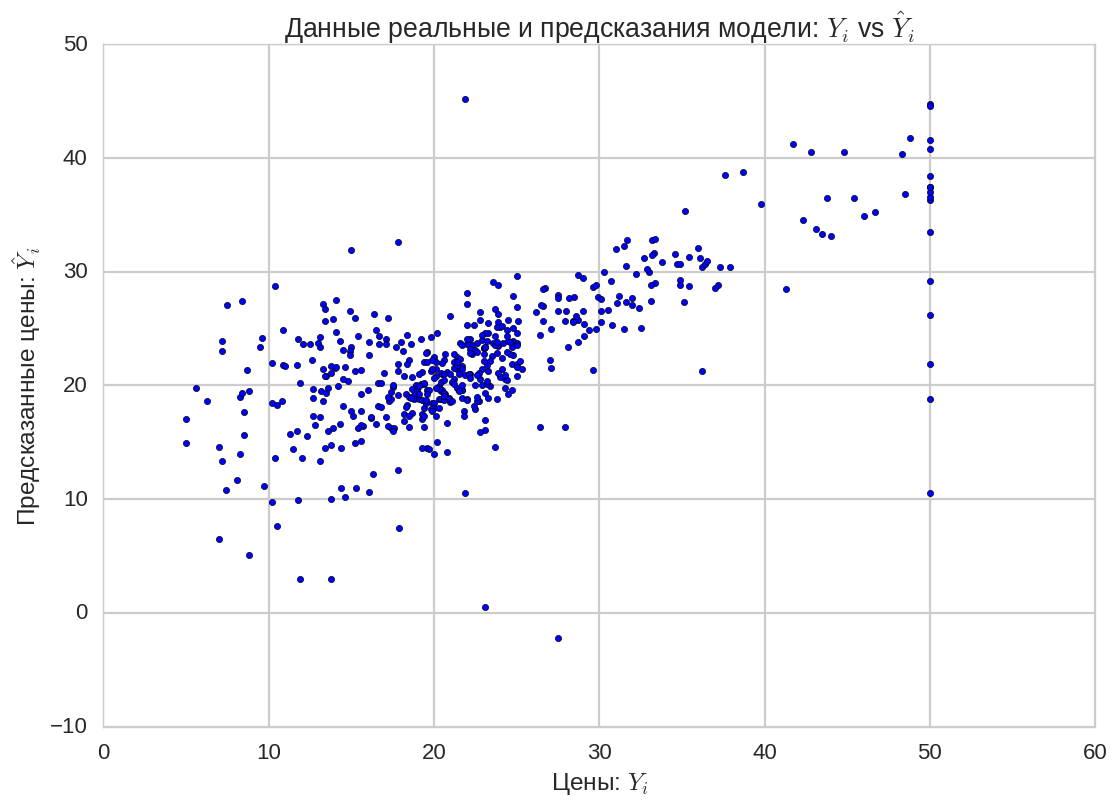

In [192]:
plt.scatter(bos['PRICE'], m.fittedvalues)
plt.xlabel(u"Цены: $Y_i$")
plt.ylabel(u"Предсказанные цены: $\hat{Y}_i$")
plt.title(u"Данные реальные и предсказания модели: $Y_i$ vs $\hat{Y}_i$")


### Построение линейной регрессии с помощью `sklearn`


In [193]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Что мы можем делать с LinearRegression? 

In [114]:
# LinearRegression.<tab>

Основные методы | Описание
--- | --- 
`lm.fit()` | Обучение модели (построение линейной регрессии
`lm.predit()` | Предсказание значений Y используя обученную модель
`lm.score()` | [Коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) (R^2). *Мера насколько хорошо модель повторяет тренировочные данные, пропорция "объясненной" дисперсии к дисперсии исходных данных*

In [195]:
lm.score?

In [115]:
# lm.<tab>

Вывод | Описание
--- | --- 
`lm.coef_` | Коэффициенты переменных
`lm.intercept_` | Перехват (точка пересечения с осью Y)

### Обучение линейной модели
***

Метод `lm.fit()` определяет коэффициенты методом наименьших квадратов. 

In [196]:
lm.fit?

In [197]:
# Использовать все 13 переменных
lm.fit(X, bos.PRICE)

# Вопросы в зал
# Что означают параметры fit_intercept=True и normalize=True
# Что нужно изменить, чтобы они были False? Что нужно сделать с данными чтобы это не повлияло?


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Перехват и коэффициенты

Рассмотрим полученные результаты тренировки линейной модели в `1m.intercept_` и `lm.coef_`.  

После обучения нам необходимо рассмотреть приблизительные значения коэффициентов $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [198]:
print u'Оценочный коэффициент перехвата:', lm.intercept_

Оценочный коэффициент перехвата: 36.4911032804


In [200]:
print u'Количество коэффициентов:', len(lm.coef_)

Количество коэффициентов: 13


In [201]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Предсказанные цены 

После обучения модели мы можем предсказывать новые значения ($\hat{Y}_i$) используя `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [202]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

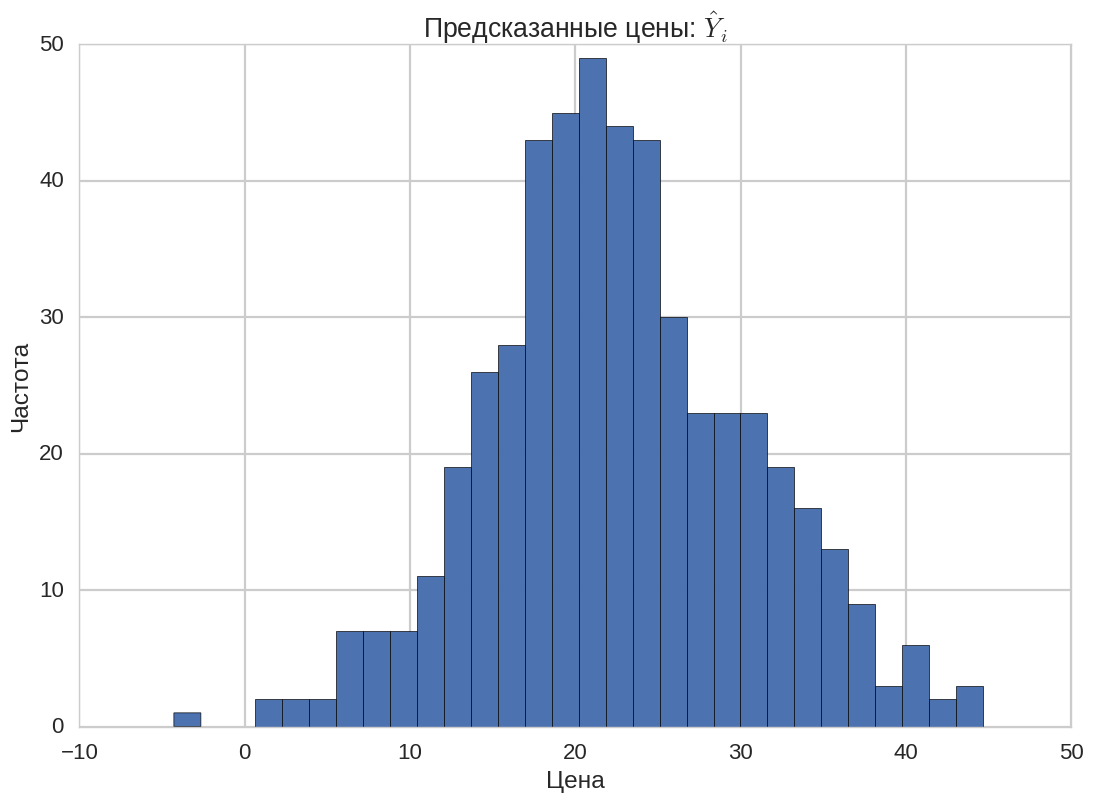

In [208]:
plt.hist(lm.predict(X), bins=30)
plt.title(u'Предсказанные цены: $\hat{Y}_i$')
plt.xlabel(u'Цена')
plt.ylabel(u'Частота')

Посмотрим, увидим ли мы такое же распределение используя `sklearn` как мы увидели в `statsmodels`.

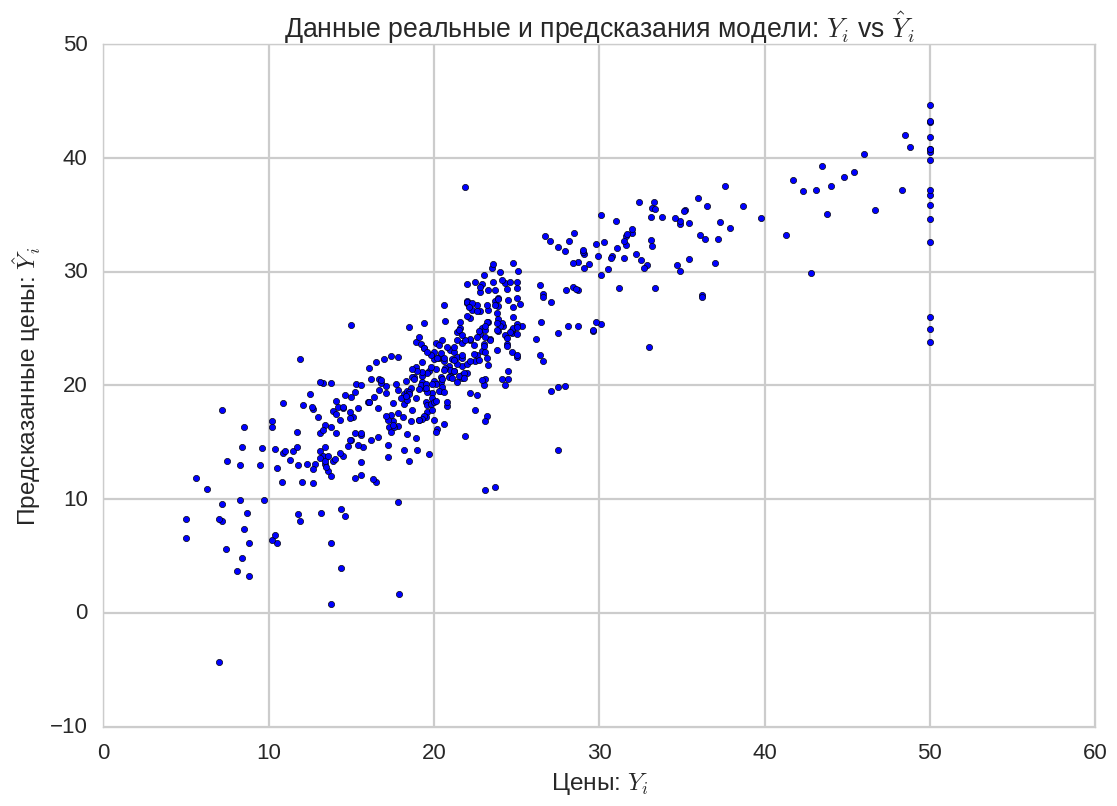

In [204]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel(u"Цены: $Y_i$")
plt.ylabel(u"Предсказанные цены: $\hat{Y}_i$")
plt.title(u"Данные реальные и предсказания модели: $Y_i$ vs $\hat{Y}_i$")

### Сумма квадратов остатков

Давайте посчитаем сумму квадратов остатков. 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [205]:
print np.sum((bos.PRICE - lm.predict(X)) ** 2)

11080.2762841


#### Среднеквадратичная ошибка

In [124]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print mseFull

21.8977792177


In [207]:
RMSE = mseFull ** 0.5
print RMSE

4.67950630064


## Отношение между `PTRATIO` и ценой на жилье
***

Попробуем предсказать цены используя только 'PTRATIO' (pupil-teacher ratio) и высчитать среднеквадратичную ошибку в этом случае. 


In [218]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [219]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print msePTRATIO

62.6522000138


In [220]:
rmsePTRATIO = msePTRATIO ** 0.5
print rmsePTRATIO

7.91531427132


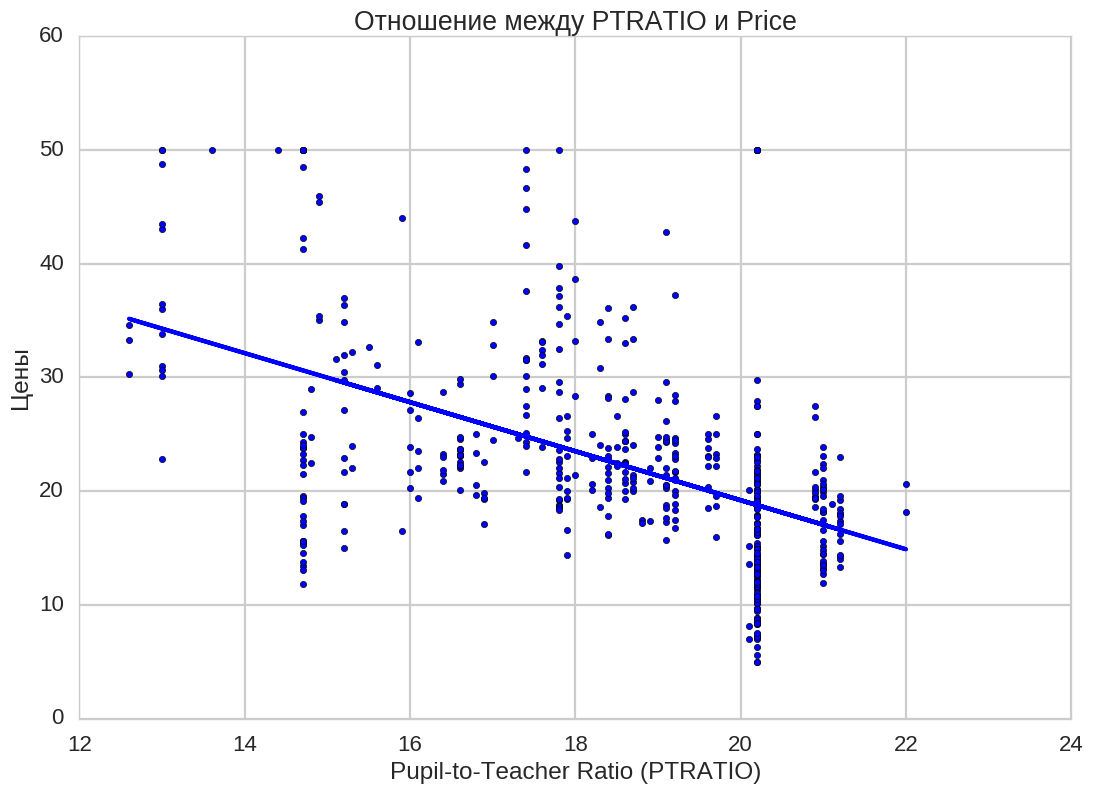

In [223]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel(u"Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel(u"Цены")
plt.title(u"Отношение между PTRATIO и Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

# Время тренировки
***

Попробуйте построить линейную модель используя три параметра

1. 'CRIM' (уровень преступности)
2. 'RM' (среднее количество комнат)
3. 'PTRATIO' (отношение количества учеников к учителям)

Посчитайте MSE и RMSE

In [224]:
# здесь будет ваше решение


## Другие важные моменты, которые нужно учитывать при построении линейной модели
***
<div class="span5 alert alert-danger">
<ul>
  <li>**Линейность**. Мы предполагаем, что зависимую переменную $Y$ можно посчитать как линейную комбинацию параметров $X$. Иногда это не так. </li>
  <li>**Постоянное среднеквадратическое отклонение**. Предполагается что SD зависимой переменной $Y$ будет постоянным для разных значений X. </li>
  <li> **Нормальное распределение ошибок**.  Предполагается что $\epsilon$ имеет нормальное распределение. 
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Иногда распределение $Y$ может быть сдвинуто относительно некоторых значений $X$.</li>
<li> **Независимые наблюдения**.  Предполагается что все наблюдения в датасете сделаны независимо.
</li>
</ul>  
</div>


# Разбиение датасетов на тренировочный и проверочный

### Почему это нужно?
***
<div class="span5 alert alert-info">

<p> Итак, в нашем примере с линейной регрессией: </p>
<ul>
  <li> Мы строим модель изначально закладывая условие, чтобы наши предсказания хорошо работали на этих данных. </li>
  <li> В результате модель будет хорошо соответствовать <b>ЭТИМ</b> данным. Как она будет себя вести на новых? </li>
    <ul>
      <li> Мы ведь хотим предиктивную модель? Для предсказания на НОВЫХ данных?</li>
    </ul>
  <li> Простое решение - отложить некоторое количество данных (для <b>проверки</b>) и <b>тренировать</b> модель на остатке </li>
  <li> Та же идея развита дальше в перекрестной валидации. </li>  
</ul>
</div>

***

Для примера мы можем сделать это вручную. 

In [129]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(456, 13)
(50, 13)
(456,)
(50,)


Почему это может быть плохой идеей? 

Другой способ - воспользоваться методом `train_test_split` в `sklearn.model_selection`. 

In [225]:
sklearn.model_selection.train_test_split?

In [228]:
# Older versions has this method in "cross_validation" submodule
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 4)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(339, 13)
(167, 13)
(339,)
(167,)


Построим модель используя тренировочные данные

In [229]:
# your turn
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Посчитаем ошибку на разных частях данных

In [230]:
# your turn
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 18.6411268327
Fit a model X_train, and calculate MSE with X_test, Y_test: 30.9204802332


#### Графики остатков

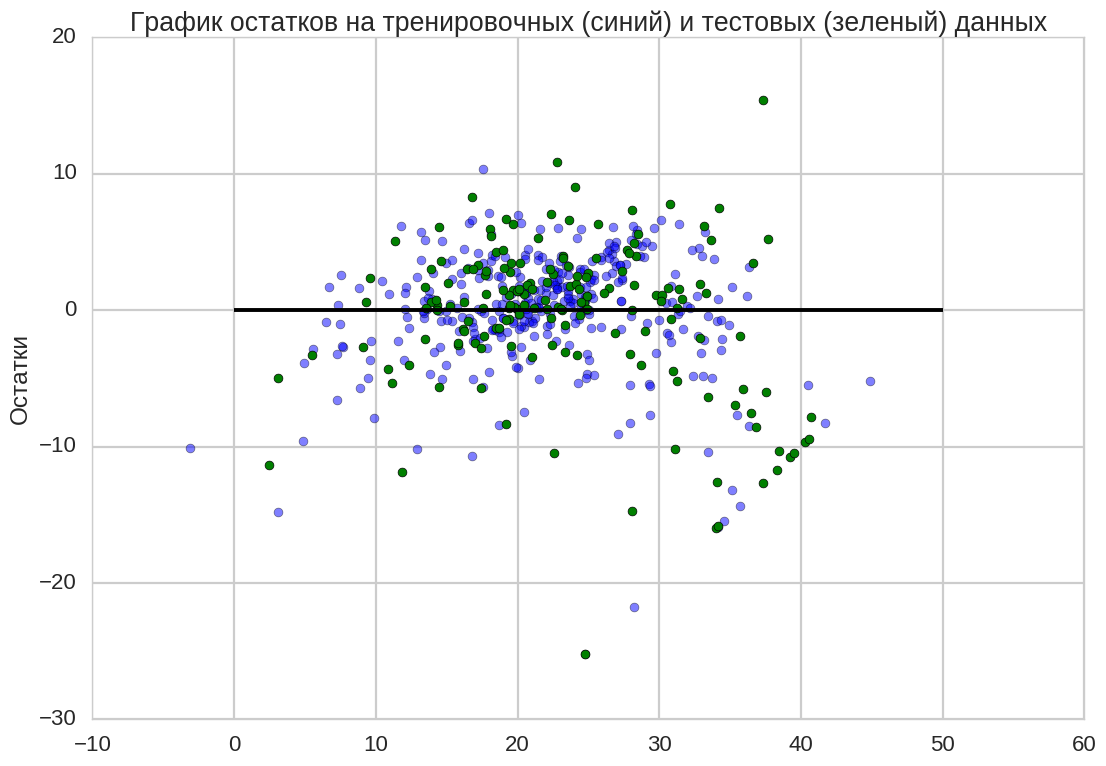

In [231]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title(u'График остатков на тренировочных (синий) и тестовых (зеленый) данных')
plt.ylabel(u'Остатки')

### Перекрестная проверка и развитие идеи тестовых данных
***
<div class="span5 alert alert-info">

<p> Развитие идеи тестирования на отдельных данных называется K-fold cross-validation.  </p>

<p> Алгоритм перекрестной проверки:</p>
<ul>
  <li> Случайно распределите ваши $n$ записей в одну из $K$ груп. В каждой будет примерно $n/k$ записей</li>
  <li> Для каждой группы $k$: </li>
    <ul>
      <li> Обучите модель (в данном случае - линейную регрессию) на всех данных за исключением $k^{th}$ группы</li>
      <li> Использовать полученную модель для предсказаний результатов в группe $k^{th}$</li>
      <li> Посчитать ошибку в $k^{th}$ группе ( $(Y_i - \hat{Y}_i)^2$ для линейной регрессии, $\mathbb{1}(Y_i = \hat{Y}_i)$ для логистической). </li>
    </ul>
  <li> Посчитать среднюю ошибку для всех групп $Err_{CV} = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y}_i)^2$ </li>
</ul>
</div>

***

К счастью, ничего из этого не потребуется делать руками, в состав ``sci-kit learn`` входит готовое решение, для ознакомления читайте [документацию](http://scikit-learn.org/stable/modules/cross_validation.html).

## Домашнее задание

Выберите либо в уже собранных вами данных, либо в одном из открытых датасетов цель для предсказания и постройте регрессионную модель **используя перекрестную проверку**

## Другой пример: данные по гейзеру "Старый служака".
***

Данные по гейзеру ["Старый служака"](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html) - известный датасет описывающий отношение между периодом ожидания между извержениями одного из вулканов Йеллоустоунского национального парка и их продолжительностью. [[webcam]](http://yellowstone.net/webcams/). 

Данный датасет входит в стандартную поставку языка программирования [R](http://cran.r-project.org).  

`faithful` - датасет с 272 наблюдениями 2-х переменных.

Колонка | Description 
--- | --- 
eruptions | Продолжительность извержений (в минутах)
waiting	| Время ожидания до следующего извержения (в минутах)

В библиотеке `statsmodels` есть метод `statsmodels.datasets.get_rdataset` который позволяет загружать данные доступные в [R](http://cran.r-project.org).  

Давайте начнем с того, что загрузим `faithful`. 

In [232]:
faithful = sm.datasets.get_rdataset("faithful")

In [233]:
sm.datasets.get_rdataset?

In [234]:
faithful?

In [235]:
faithful.title

'Old Faithful Geyser Data'

In [236]:
faithful = faithful.data
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [237]:
faithful.shape

(272, 2)

### Гистограмма 
***

Создадим гистограмму времени ожидания извержения. Что мы видим? 

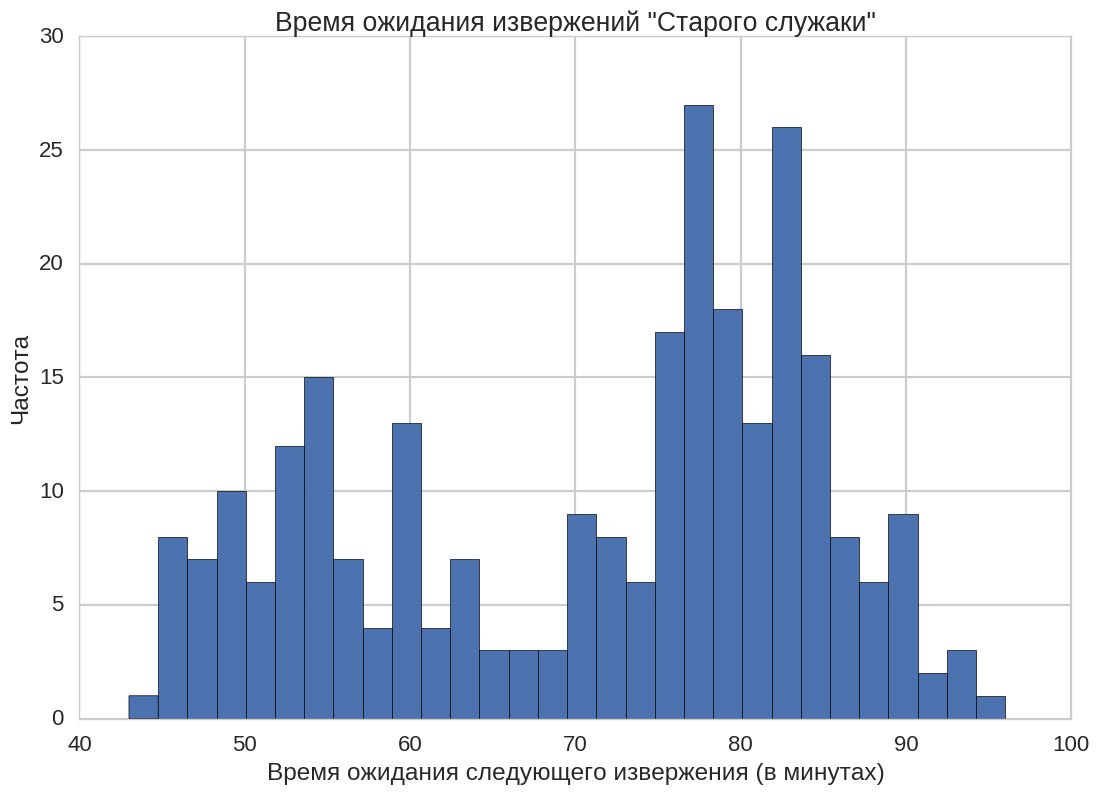

In [238]:
plt.hist(faithful.waiting, bins=30)
plt.xlabel(u'Время ожидания следующего извержения (в минутах)')
plt.ylabel(u'Частота')
plt.title(u'Время ожидания извержений "Старого служаки"')
plt.show()

[Old Faithful isn’t as “faithful” as you might think](http://people.stern.nyu.edu/jsimonof/classes/2301/pdf/geystime.pdf). 

### Диаграмма рассеяния

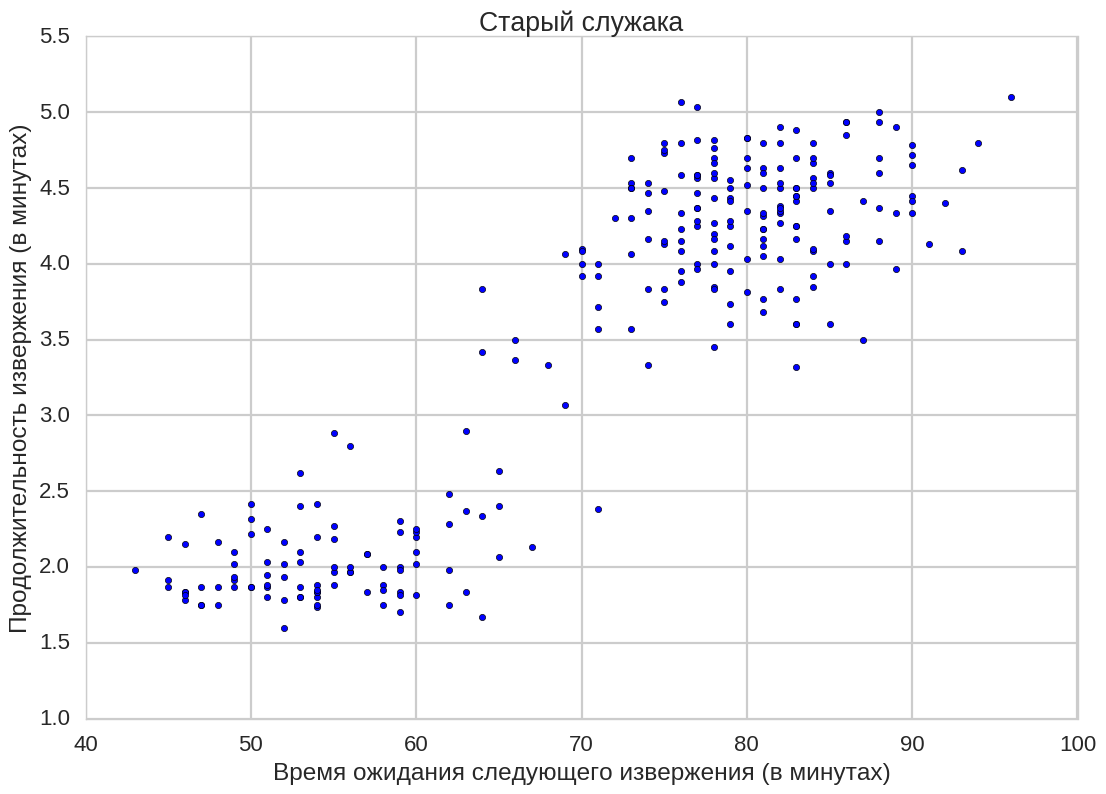

In [239]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel(u'Время ожидания следующего извержения (в минутах)')
plt.ylabel(u'Продолжительность извержения (в минутах)')
plt.title(u'Старый служака')
plt.show()


### Строим линейную регрессию используя `statsmodels`
***

Построим линейную регрессию для `faithful`, и оценим продолжительность извержения если с прошлого прошло 75 minutes.

$$ Eruptions = \beta_0 + \beta_1 * Waiting + \epsilon $$ 

In [242]:
X = faithful.waiting
y = faithful.eruptions
model = sm.OLS(y, X)

In [246]:
# model.<tab>

In [247]:
results = model.fit()

In [249]:
# results.<tab>

In [250]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     9621.
Date:                Thu, 09 Feb 2017   Prob (F-statistic):          9.97e-214
Time:                        18:33:42   Log-Likelihood:                -250.30
No. Observations:                 272   AIC:                             502.6
Df Residuals:                     271   BIC:                             506.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
waiting        0.0501      0.001     98.086      0.0

In [148]:
results.params.values

array([ 0.05012919])

Как видим в данном случае не был рассчитан перехват ($\beta_0$) для линейной модели. Чтобы добавить его используем функцию `sm.add_constant`.  

In [252]:
sm.add_constant?

In [253]:
X = sm.add_constant(X)
X.head()

,const,waiting
0,1,79
1,1,54
2,1,74
3,1,62
4,1,85


Теперь посчитаем модель с перехватом. 

In [254]:
modelW0 = sm.OLS(y, X)
resultsW0 = modelW0.fit()
print resultsW0.summary()

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 09 Feb 2017   Prob (F-statistic):          8.13e-100
Time:                        18:36:11   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

Мы хотим посчитать продолжительность извержения для времени ожидания в 75 минут. Для этого можно использовать формулу и посчитать вручную

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * 75 $$ 

или воспользоваться `results.predict`.  

In [255]:
newX = np.array([1,75])
resultsW0.params[0]*newX[0] + resultsW0.params[1] * newX[1]

3.7980801099789647

In [256]:
resultsW0.predict(newX)

array([ 3.79808011])

Используя полученную модель мы можем сказать что после 75 минут ожидания, продолжительность следующего извержения будет примерно 3.80 минут (3 минуты 48 секунд).

### Чертим график регрессии 
***

Вместо использования `resultsW0.predict(X)`, можно использовать `resultsW0.fittedvalues` которые равны $\hat{y}$. 

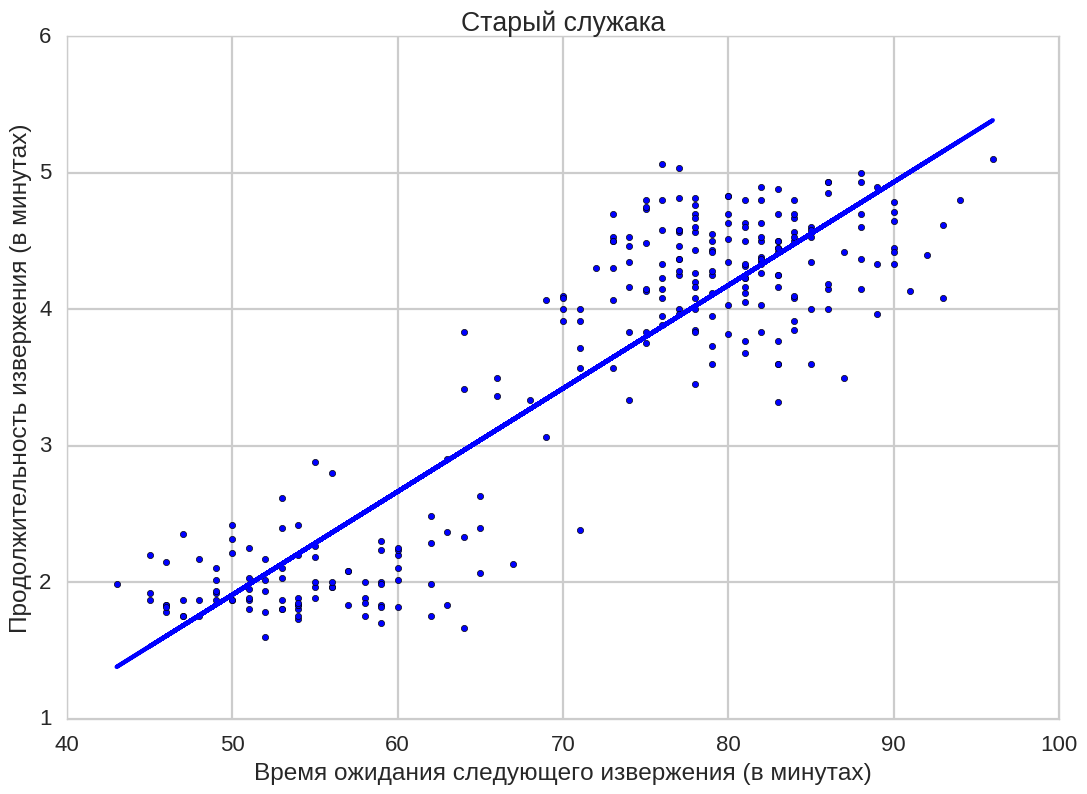

In [257]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel(u'Время ожидания следующего извержения (в минутах)')
plt.ylabel(u'Продолжительность извержения (в минутах)')
plt.title(u'Старый служака')

plt.plot(faithful.waiting, resultsW0.fittedvalues, color='blue', linewidth=3)
plt.show()


### Остатки, сумма квадратов остатков, MSE
***

$$r_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$$

$$ S = \sum_{i=1}^n r_i = \sum_{i=1}^n (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2 $$

Остатки можно легко посчитать используя `resultsW0.predict`

In [258]:
resids = faithful.eruptions - resultsW0.predict(X)


In [259]:
resids = resultsW0.resid


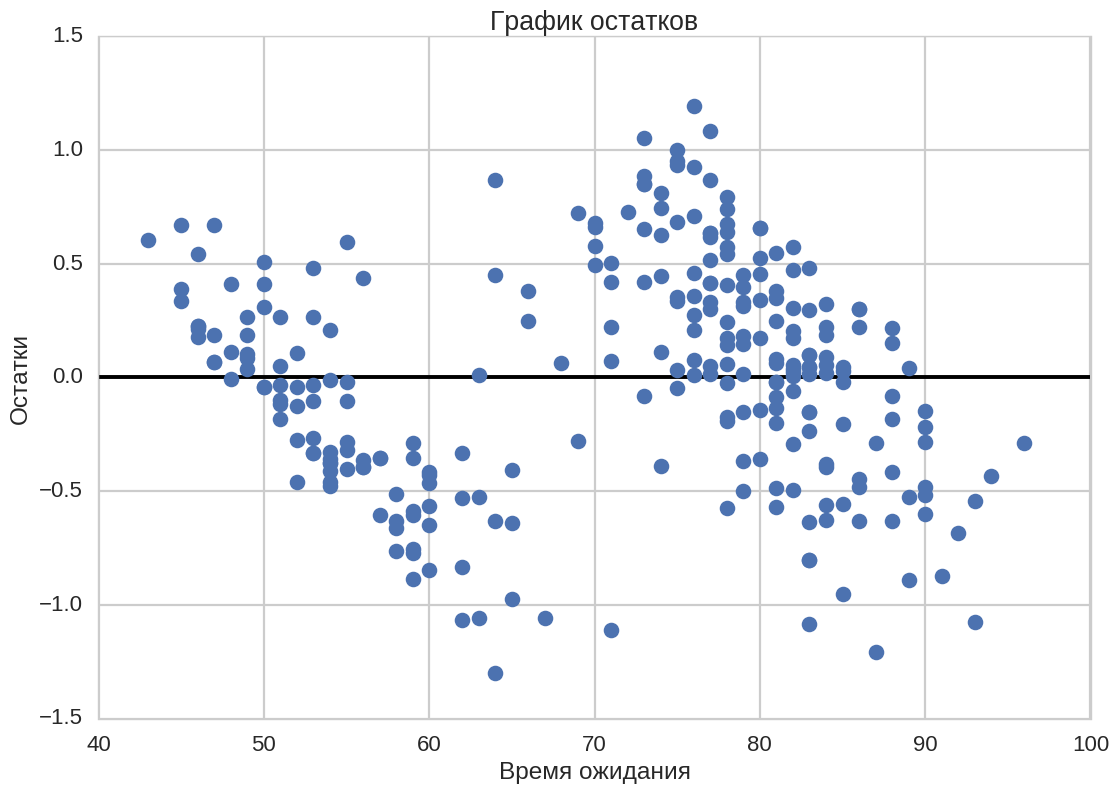

In [260]:
plt.plot(faithful.waiting, resids, 'o')
plt.hlines(y = 0, xmin=40, xmax = 100)
plt.xlabel(u'Время ожидания')
plt.ylabel(u'Остатки')
plt.title(u'График остатков')
plt.show()

In [261]:
print np.sum((faithful.eruptions - resultsW0.predict(X)) ** 2)

66.5617757127


In [262]:
print np.mean((faithful.eruptions - resultsW0.predict(X)) ** 2)

0.244712410708


## Матричный способ построения линейной регрессии 
***

Давайте построим линейную регрессию для `faithful` без использования готовых решений, взамен мы посчитаем коэффициенты сами!

$$ \hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $$ 

Функция `numpy` [`np.dot`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot) это дает двух матриц/векторов.  

Функция `numpy` [`np.linalg.inv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv) позволит нам высчитать обратную матрицу. 

In [263]:
X = sm.add_constant(faithful.waiting)
y = faithful.eruptions


Посчитаем $X^{\top}X$


In [264]:
np.dot(X.T, X)


array([[    272,   19284],
       [  19284, 1417266]])

Теперь посчитаем обратную матрицу для $X^{\top}X$  или  $(X^{\top}X)^{-1}$. 

In [265]:
np.linalg.inv(np.dot(X.T, X))

array([[  1.04029479e-01,  -1.41547492e-03],
       [ -1.41547492e-03,   1.99652136e-05]])

И наконец получим финальный результат $\hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $

In [266]:
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print u"Данные которые посчитали мы:", beta
print u"Данные посчитанные statmodels: ", resultsW0.params.values




Данные которые посчитали мы: [-1.87401599  0.07562795]
Данные посчитанные statmodels:  [-1.87401599  0.07562795]


# Другие типы регрессий
***
<div class="span5 alert alert-info">

<p>Не всегда нам нужно предсказать непрерывную переменную. Иногда нам нужна бинарная классификация (0 или 1). Иногда нам нужно целое число (1,2,3...). Что делать в таких случаях?</p>

<p>Использовать другие типы регрессий!</p>  

<p>[Хороший источник информации по регрессиям разного типа](http://www.datasciencecentral.com/profiles/blogs/10-types-of-regressions-which-one-to-use). </p>
</div>


# Логистическая регрессия

<div class="span5 alert alert-info">
<p>Логистическая регрессия это вероятностная модель, которая проводит соответствия между бинарными результатами и набором числовых значений.</p>

<p>Представим, что у нас есть набор бинарных наблюдений (0/1)  $Y_1,\cdots,Y_n$, и для каждого наблюдения $Y_i$ у нас есть вектор параметров $X_i$. Модель логистической регрессии предполагает, что есть некий скрытый набор **весов** $\beta$, по одному на каждый параметр, таких, что данные сгенерированные подбрасыванием монетки с соответствующей вероятностью выпадения 1 заданы следующим уравнением:

$$
P(Y_i = 1) = \mathrm{logistic}(\sum \beta_i X_i),
$$

где

$$
\mathrm{logistic}(x) = \frac{e^x}{1+e^x}.
$$
</p>
<p>Когда мы обучаем модель логистической регрессии, мы определяем значения $\beta$ которые позволяют модели наилучшим образом воспроизвести наблюдения из тренировочных данных. После завершения обучения мы сможем использовать полученные данные для предсказания будущих результатов.</p>

</div>

Из книги Эдварда Тафта http://www.edwardtufte.com/tufte/ebooks, раздел "Visual and Statistical Thinking: Displays of Evidence for Making Decisions":

>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

Но они не смогли убедительно обосновать свое беспокойство и административным решением NASA пуск был все же проведен.

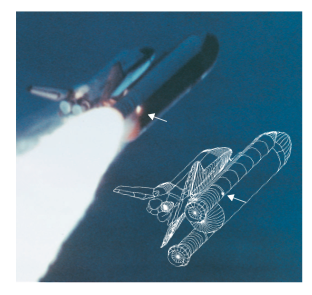

In [163]:
from IPython.display import Image as Im
from IPython.display import display
Im('./images/shuttle.png')

На изображении выше отмечено место утечки через O-ring.

У нас есть данные о прошлых проблемах O-rings для различных температур.

In [267]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("./data/chall.txt")])
data

array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

Давайте построим график

In [269]:
# fit logistic regression model
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

dat = pd.DataFrame(data, columns = ['Temperature', 'Failure'])
logit_model = logit('Failure ~ Temperature',dat).fit()
print logit_model.summary()


Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Feb 2017   Pseudo R-squ.:                  0.2813
Time:                        18:56:01   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041         0.581    29.505
Temperature    -0.2322    

In [274]:
# calculate predicted failure probabilities for new termperatures
x = np.linspace(40, 100, 1000)
p = logit_model.params
eta = p['Intercept'] + x*p['Temperature']
y = np.exp(eta)/(1 + np.exp(eta))

А теперь построим график для других температур

(-0.1, 1.1)

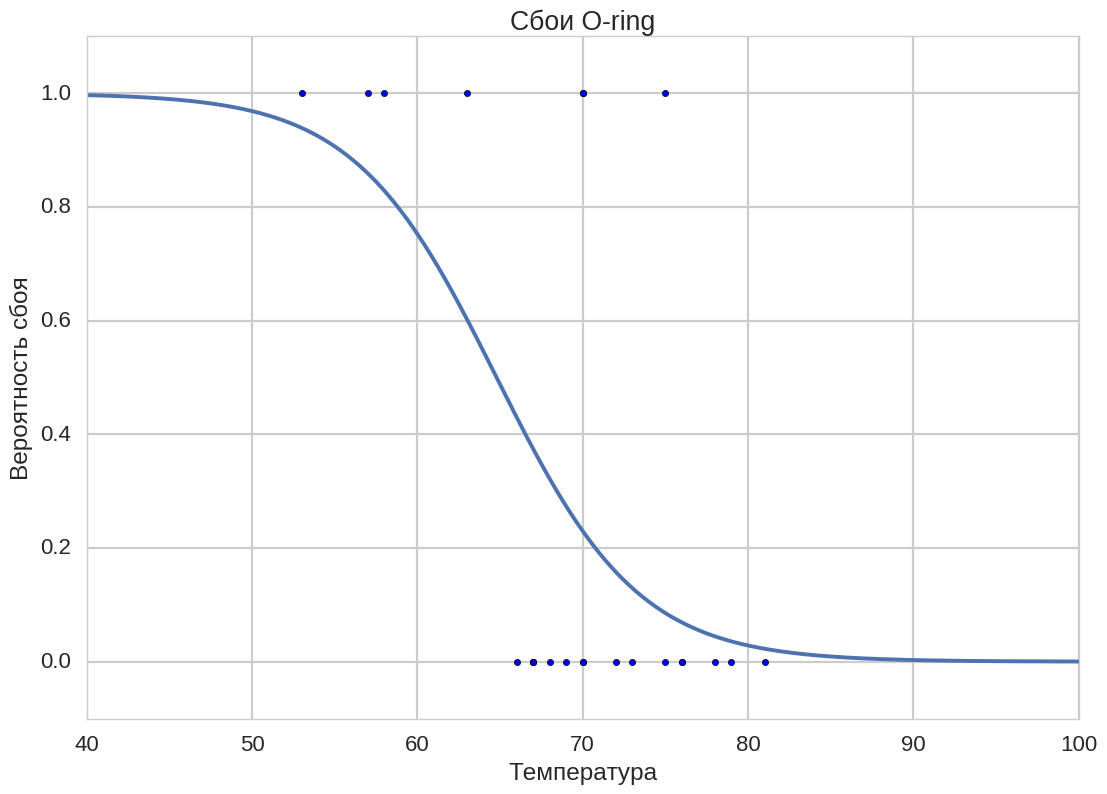

In [275]:
# plot data
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel(u'Температура')
plt.ylabel(u'Вероятность сбоя')
plt.title(u'Сбои O-ring')

# plot fitted values
plt.plot(x, y)

# change limits, for a nicer plot
plt.xlim(40, 100)
plt.ylim(-0.1, 1.1)
